In [1]:
from neutcurve import HillCurve

In [2]:
dir(HillCurve)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_evaluate_log',
 '_fit_curve',
 '_minimize_fit',
 'dataframe',
 'evaluate',
 'fracinfectivity',
 'ic50',
 'ic50_bound',
 'ic50_stdev',
 'ic50_str',
 'icXX',
 'icXX_bound',
 'icXX_str',
 'plot']

In [3]:
print(HillCurve.__doc__)

A fitted Hill curve, optionally with free baselines.

    Fits :math:`f\left(c\right) = b + \frac{t - b}{1 + \left(c/m\right)^s}`
    where :math:`f\left(c\right)` is the fraction infectivity remaining
    at concentration :math:`c`, :math:`m` is the midpoint
    of the neutralization curve, :math:`t` is the top
    value (e.g., 1), :math:`b` is the bottom value (e.g., 0),
    and :math:`s` is the slope of the curve. Because
    :math:`f\left(c\right)` is the fraction infectivity remaining, we expect
    :math:`f\left(c\right)` to get smaller as :math:`c` gets larger.
    This should lead us to fit :math:`s > 0`.

    When :math:`t = 1` and :math:`b = 0`, this equation is identical to the
    `Hill curve <https://en.wikipedia.org/wiki/Hill_equation_(biochemistry)>`_,
    except that we are calculating the fraction **unbound** rather than
    the fraction bound.

    You may want to fit the fraction neutralized rather than the fraction
    infectivity. In that case, set `infectivity_or_

In [4]:
import numpy

from neutcurve import HillCurve
from neutcurve.colorschemes import CBPALETTE

In [5]:
# why are we entering values for m, s?  I thought m is going to be calculated as the IC50 rather than entered, or is it instead just a midpoint like median value in the data? 
# will we be ultimately be setting the hillslope, or is it being calculated?
m = 0.03
s = 1.9
b = 0.1
t = 1.0
cs = [0.002 * 2**x for x in range (9)]
fs = [HillCurve.evaluate(c, m, s, b, t) for c in cs]

In [6]:
neut = HillCurve (cs, fs, fixbottom=False)
numpy.allclose(neut.midpoint, m)


True

In [7]:
numpy.allclose(neut.slope, s, atol=1e-4)


True

In [8]:
numpy.allclose(neut.top, t)

True

In [9]:
numpy.allclose(neut.bottom, b)


True

In [10]:
for key, val in neut.params_stdev.items():
    print(f"{key} = {val:.2g}")



midpoint = 0.062
slope = 6.3
top = 0
bottom = 0.73


In [11]:
neut.ic50() > neut.midpoint

True

In [12]:
print(f"IC50: {neut.ic50():.3f} +/- {neut.ic50_stdev():.3f}")

IC50: 0.034 +/- 0.070


In [13]:
numpy.allclose(neut.ic50(), 0.0337385586)

True

In [14]:
numpy.allclose(0.5, neut.fracinfectivity(neut.ic50()))

True

In [15]:
#here we constrain the top to 1 and bottom to 0; now the midpoint and IC50 are the same
b2 = 0
t2 = 1
fs2 = [HillCurve.evaluate(c, m, s, b2, t2) for c in cs]
neut2 = HillCurve(cs, fs2)
numpy.allclose(neut2.midpoint, m)

True

In [16]:
numpy.allclose(neut2.ic50(),m)

True

In [17]:
neut2.ic50() < neut2.midpoint

False

In [18]:
neut2.ic50_bound()

'interpolated'

In [19]:
print(m)

0.03


In [20]:
# now we're going to fit concentrations that are all *less* than the midpoint
# this is similar to RBD depleted sera, for example
cs3 = [1e-5 * 2**x for x in range(7)]
(cs3[-1] < m)

True

In [21]:
fs3 = [HillCurve.evaluate(c, m, s, b2, t2) for c in cs3]
neut3 = HillCurve(cs3, fs3)
neut3.ic50() is None

True

In [22]:
#I am confused by what this is saying.  Is it saying that the bound neut3.ic50 is equla to cs3[-1]?
numpy.allclose(neut3.ic50(method='bound'), cs3[-1])

True

In [23]:
neut3.ic50_str()

'>0.00064'

In [24]:
neut.ic50_str()

'0.0337'

In [25]:
neut.ic50_bound()

'interpolated'

In [26]:
neut3.ic50_bound()

'lower'

In [27]:
# using method .dataframe to get measured data; rounds to 3 decimal places
neut.dataframe('measured').round(3)

,concentration,measurement,fit,stderr
0,0.002,0.995,0.995,NaN
1,0.004,0.981,0.981,NaN
2,0.008,0.932,0.932,NaN
3,0.016,0.791,0.791,NaN
4,0.032,0.522,0.522,NaN
5,0.064,0.272,0.272,NaN
6,0.128,0.154,0.154,NaN
7,0.256,0.115,0.115,NaN
8,0.512,0.104,0.104,NaN


In [28]:
# add one more data point
neut.dataframe([0.6]).round(3)

,concentration,measurement,fit,stderr
0,0.002,0.995,0.995,NaN
1,0.004,0.981,0.981,NaN
2,0.008,0.932,0.932,NaN
3,0.016,0.791,0.791,NaN
4,0.032,0.522,0.522,NaN
5,0.064,0.272,0.272,NaN
6,0.128,0.154,0.154,NaN
7,0.256,0.115,0.115,NaN
8,0.512,0.104,0.104,NaN
9,0.600,NaN,0.103,NaN


/fh/fast/bloom_j/software/miniconda3/envs/BloomLab/lib/python3.8/site-packages/numpy/core/_methods.py:43: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/fh/fast/bloom_j/software/miniconda3/envs/BloomLab/lib/python3.8/site-packages/numpy/core/_methods.py:39: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


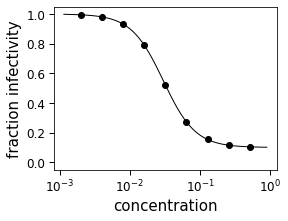

In [29]:
fig, ax = neut.plot()

In [30]:
neut_linear = HillCurve(cs, fs, fitlogc=False, fixbottom=False)

In [31]:
all(numpy.allclose(getattr(neut, attr), getattr(neut_linear, attr))
    for attr in ['top', 'bottom', 'slope', 'midpoint'])

True

In [32]:
# This is under demostrate HillCurve.icXX.  Why is is neut.icXX?
neut.icXX(0.95) is None

True

In [33]:
# I thought it was only the neut3 that was lower bound, not neut?
neut.icXX_bound(0.95)

'lower'

In [34]:
#I don't know what this means
'{:.4f}'.format(neut.icXX(0.8), 4)

'0.0896'

In [35]:
#also don't understand this
numpy.allclose(0.2, neut.fracinfectivity(neut.icXX(0.8)))

True

In [37]:
# now fitting NT50 rather than fraction infectivity
# why are we using allclose if we have to know the answer before asking the command?  eg below.with 0.9
# is this asking if the top is 0.9 ie rather than 1?
neut_opp = HillCurve(cs, [1-f for f in fs],
                    fixtop=False,fixbottom=False,
                    infectivity_or_neutralized='neutralized')
numpy.allclose(neut_opp.top, 0.9)

True

In [38]:
numpy.allclose(neut_opp.bottom, 0)

True

In [39]:
numpy.allclose(neut_opp.midpoint, m)

True

In [40]:
neut_opp.ic50() < neut_opp.midpoint

True

/fh/fast/bloom_j/software/miniconda3/envs/BloomLab/lib/python3.8/site-packages/numpy/core/_methods.py:43: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/fh/fast/bloom_j/software/miniconda3/envs/BloomLab/lib/python3.8/site-packages/numpy/core/_methods.py:39: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


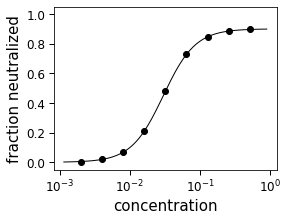

In [44]:
fig, ax = neut_opp.plot(ylabel='fraction neutralized')